In [1]:
import asyncio
from langchain.agents import Tool
from yt_music import NotAuthenticated as yt
from langgraph.graph import StateGraph, END, START
from typing import Annotated, TypedDict, List, Optional, Any
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph.message import add_messages
from pydantic import BaseModel
from IPython.display import Image, display
import gradio as gr
from yt_music import Authenticated as yt_oath
from langgraph.checkpoint.memory import MemorySaver
from langchain.tools import StructuredTool

c:\Users\vimal\Documents\GitHub\Youtube-Music-With-AI-Agents\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
llm = ChatOpenAI(api_key = 'ollama', base_url = "http://127.0.0.1:11434/v1", model = 'qwen3:8b' )

In [3]:
memory = MemorySaver()

In [4]:
yt_music = yt()
yt_oath_user = yt_oath()

In [5]:
tools = yt_oath_user.get_yt_tools()
print(tools)

[Tool(name='get_lib_playlist', description=' use this tool to get all the playlist user currently has in their library. note the user is already authenticated. just pass a dummy user id to the function', func=<bound method Authenticated.get_user_library of <yt_music.Authenticated object at 0x000001577A2C1640>>), Tool(name='youtube_music_search', description='use this tool to search songs from youtube music', func=<bound method Authenticated.search_autenticated of <yt_music.Authenticated object at 0x000001577A2C1640>>), StructuredTool(name='add_to_playlist', description='use this tool to add a song to user playlist. you need to pass the playlist id and the song id or video id to the tool', args_schema=<class 'langchain_core.utils.pydantic.add_to_playlist'>, func=<bound method Authenticated.add_song_to_playlist of <yt_music.Authenticated object at 0x000001577A2C1640>>), StructuredTool(name='create_playlist', description='use this tool to create a new playlist for the user in youtube musi

In [ ]:
# search_tool = Tool(
#     name="search_music",
#     description="use this tool to search for a song on YouTube Music",
#     func=yt_music.search_song  # async function
# )


In [ ]:
# result = search_tool.invoke("The kings affirmation Iniko")
# print(result)

[{'song_id': 'bVwPpsEqmm8', 'title': "The King's Affirmation - Chill Mix (feat. Reuel Williams)", 'duration': '3:07', 'artists': ['Iniko'], 'album': ''}, {'song_id': 'S45rTCJwsWE', 'title': "The King's Affirmation", 'duration': None, 'artists': ['Iniko'], 'album': ''}, {'song_id': 'lJcO6gh-wzg', 'title': 'Jericho', 'duration': None, 'artists': ['Iniko'], 'album': ''}, {'song_id': 'tk0XbOHbmEQ', 'title': 'Pinocchio', 'duration': None, 'artists': ['Iniko'], 'album': ''}, {'song_id': 'Erp2J2g2d3A', 'title': 'i will be one of the greatest', 'duration': None, 'artists': ['TwentySixteen 意味'], 'album': ''}, {'song_id': 'SCW1-IMY60Y', 'title': 'Yosemite (Song For The Ahwahnechee)', 'duration': None, 'artists': ['Iniko'], 'album': ''}]


In [ ]:
# get_library = Tool(
#     name = 'get_user_playlist',
#     description= 'use this tool to get the full music playlist of the user. this gives all the playlsit existing library the user has. note the user is already authenticated and just pass a dummy user id if needed to the tool',
#     func = yt_oath_user.get_user_library
# )

In [ ]:
# result = get_library.invoke('demo')
# print(result)

[
    {
        "title": "Liked Music",
        "playlistId": "LM",
        "description": "Auto playlist",
        "track_count": null
    },
    {
        "title": "Vimals",
        "playlistId": "PLZnYAMmCI5BY7zF-ShOUWie2qHgWuXQHo",
        "description": "AI Playground \u2022 379 tracks",
        "track_count": "379"
    },
    {
        "title": "Songs I grew Up with",
        "playlistId": "PLZnYAMmCI5BaA5DnAoll8wJILmJSec6Ya",
        "description": "AI Playground \u2022 197 tracks",
        "track_count": "197"
    },
    {
        "title": "Malayalam Songs for Travel",
        "playlistId": "PLZnYAMmCI5BbD3Vtv3LiuWLH_7Qw4hJR3",
        "description": "AI Playground \u2022 40 tracks",
        "track_count": "40"
    },
    {
        "title": "Malayalm Modern(Rap / Hip Hop)",
        "playlistId": "PLZnYAMmCI5BZUmXqXzPdffNe3PPzk_G7Y",
        "description": "AI Playground \u2022 28 tracks",
        "track_count": "28"
    },
    {
        "title": "malayalam",
        "playlistId

In [ ]:
# add_to_playlist = StructuredTool.from_function(
#     name = 'add_to_playlist',
#     description= 'use this tool to add a song to user playlist. you need to pass the playlist id and the song id or video id to the tool',
#     func= yt_oath_user.add_song_to_playlist
# )

In [ ]:
# result = add_to_playlist.invoke({
#     "playlist_id": "PLZnYAMmCI5BY7zF-ShOUWie2qHgWuXQHo",
#     "song_id": ["bVwPpsEqmm8"]
# })
# print(result)

{'status': 'STATUS_SUCCEEDED', 'playlistEditResults': [{'videoId': 'bVwPpsEqmm8', 'setVideoId': '2AAB0CD831B25FC9', 'multiSelectData': {'multiSelectParams': 'CAESIlBMWm5ZQU1tQ0k1Qlk3ekYtU2hPVVdpZTJxSGdXdVhRSG8=', 'multiSelectItem': 'Ch8KC2JWd1Bwc0VxbW04EhAyQUFCMENEODMxQjI1RkM5'}}]}


In [ ]:
# result = await get_library.ainvoke("vimal")
# print(result)

[
    {
        "title": "Liked Music",
        "playlistId": "LM",
        "description": "Auto playlist",
        "track_count": null
    },
    {
        "title": "Vimals",
        "playlistId": "PLZnYAMmCI5BY7zF-ShOUWie2qHgWuXQHo",
        "description": "AI Playground \u2022 375 tracks",
        "track_count": "375"
    },
    {
        "title": "Songs I grew Up with",
        "playlistId": "PLZnYAMmCI5BaA5DnAoll8wJILmJSec6Ya",
        "description": "AI Playground \u2022 197 tracks",
        "track_count": "197"
    },
    {
        "title": "Malayalam Songs for Travel",
        "playlistId": "PLZnYAMmCI5BbD3Vtv3LiuWLH_7Qw4hJR3",
        "description": "AI Playground \u2022 40 tracks",
        "track_count": "40"
    },
    {
        "title": "Malayalm Modern(Rap / Hip Hop)",
        "playlistId": "PLZnYAMmCI5BZUmXqXzPdffNe3PPzk_G7Y",
        "description": "AI Playground \u2022 28 tracks",
        "track_count": "28"
    },
    {
        "title": "malayalam",
        "playlistId

In [6]:
llm_with_tools = llm.bind_tools(tools)

In [7]:
class State(TypedDict):
    messages : Annotated[List[Any], add_messages]

In [8]:
def music_search(state : State):
    response_from_llm = llm_with_tools.invoke(state['messages'])
    new_state = {
        'messages' : [response_from_llm]
    }
    return new_state

In [9]:
graph_builder = StateGraph(State)

In [10]:
graph_builder.add_node("musicbot" , music_search)
graph_builder.add_node("tools" , ToolNode(tools=tools))

In [11]:
graph_builder.add_edge(START, "musicbot")
graph_builder.add_conditional_edges("musicbot", tools_condition, "tools")
graph_builder.add_edge("tools", "musicbot")
graph_builder.add_edge("musicbot", END)

In [12]:
graph = graph_builder.compile(checkpointer=memory)

In [13]:
graph.get_graph().print_ascii()

        +-----------+         
        | __start__ |         
        +-----------+         
               *              
               *              
               *              
         +----------+         
         | musicbot |         
         +----------+         
          .         *         
        ..           **       
       .               *      
+---------+         +-------+ 
| __end__ |         | tools | 
+---------+         +-------+ 


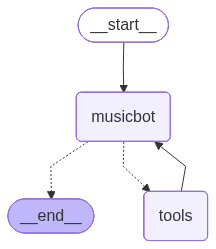

In [15]:
# sometimes this code will not work. this is an error with mermaid itself
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
def process_ai_response(response):
    if "<think>" in response and "</think>" in response:
        # Extract everything cleanly
        before_think = response.split("<think>")[0]
        think_content = response.split("<think>")[1].split("</think>")[0]
        after_think = response.split("</think>")[1]

        # Format the think block for display
        formatted_think = f"> 💭 *{think_content.strip()}*"

        # Combine all parts
        return after_think.strip()
    else:
        return response

In [19]:
config =  {'configurable' : {'thread_id' : '7'}}

In [20]:
async def chat(message, history):
    current_state = {
        'messages' : message
    }

    result = await graph.ainvoke(current_state, config = config)

    return process_ai_response(result['messages'][-1].content)

In [21]:
gr.ChatInterface(chat, type = 'messages').launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
